In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from itertools import chain
from sklearn.externals import joblib

%matplotlib inline

input_folder = '../data/input/ICWSM11'
output_folder = '../data/working'

In [2]:
df1 = pd.read_csv('%s/MAINSTREAM_NEWS_bullying.csv' % input_folder,
                  names=['date', 'author', 'link', 'title', 'content'],
                  parse_dates=['date'],
                  error_bad_lines=False)

# clean up the title
df1.title = df1.title.str.replace("(\||- \t).+", "")
df1.author = df1.author.str.replace("(\||- \t).+", "")
# drop events with duplicated links
df1.drop_duplicates('link', inplace=True)
df1.dropna(subset=['date', 'content'], inplace=True)
df1.sort_values('date', inplace=True)

In [3]:
df2 = pd.read_csv('%s/SOCIAL_MEDIA_bullying.csv' % input_folder,
                  names=['date', 'author', 'link', 'content'],
                  parse_dates=['date'],
                  error_bad_lines=False)
# clean up the title
df2.author = df2.author.str.replace("(\||- \t).+", "")
# drop events with duplicated links
df2.drop_duplicates('link', inplace=True)
df2.dropna(subset=['date', 'content'], inplace=True)
df2.sort_values('date', inplace=True)

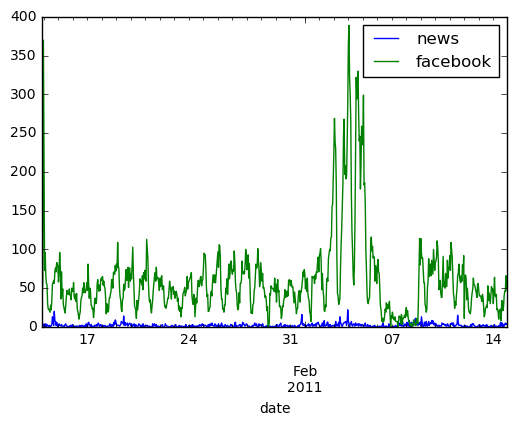

In [4]:
plt.figure()
df1.set_index('date').resample('H').size().plot()
df2.set_index('date').resample('H').size().plot()

plt.legend(['news', 'facebook'])

Get bag-of-word representation

In [5]:
# remove urls and @
df1.content = df1.content.str.replace(r'https?:\/\/.*[\r\n]*', '')
df1.content = df1.content.str.replace(r'@\w+', '')
df1.head()

df2.content = df2.content.str.replace(r'https?:\/\/.*[\r\n]*', '')
df2.content = df2.content.str.replace(r'@\w+', '')

df2.head()

date           author  \
252 2011-01-13 21:08:00  Armando V. Ruiz   
253 2011-01-13 21:08:01    April Plourde   
364 2011-01-13 21:08:08       Dw Whitely   
438 2011-01-13 21:08:48  Heather Hetrick   
457 2011-01-13 21:10:26  Heather Hetrick   

                                                  link  \
252  http://facebook.com/post/?id=508019809_1339893...   
253  http://facebook.com/post/?id=818520541_1643520...   
364  http://facebook.com/post/?id=100000538678280_1...   
438  http://facebook.com/post/?id=1355538253_118710...   
457  http://facebook.com/post/?id=1355538253_118394...   

                                               content  
252  I will not be satisfied until I am my own boss...  
253  Wow. I thought I left Atown to get away from t...  
364            i have a bully on my ass kill the prick  
438  I am sending the school a letter letting them ...  
457  If the bus is not there 1 min after I send him...

In [6]:
vectorizer = CountVectorizer(min_df=2, max_df=0.8, stop_words='english')
corpus = chain.from_iterable([df1.content, df2.content])
vectorizer = vectorizer.fit(corpus)

In [7]:
temp1 = vectorizer.transform(df1.content)
df1['bow'] = [temp1[i, :] for i in range(len(df1))]

temp2 = vectorizer.transform(df2.content)
df2['bow'] = [temp2[i, :] for i in range(len(df2))]

In [8]:
# drop the empty records
df1 = df1[df1.bow.apply(lambda x: x.data.sum()) > 0]
df2 = df2[df2.bow.apply(lambda x: x.data.sum()) > 0]

In [9]:
df1.to_pickle('%s/MAINSTREAM_NEWS_bullying.pkl' % output_folder)
df2.to_pickle('%s/SOCIAL_MEDIA_bullying.pkl' % output_folder)

In [10]:
joblib.dump(vectorizer, '%s/vectorizer.pkl' % output_folder)

['../data/working/vectorizer.pkl']

In [11]:
temp1

<1560x26335 sparse matrix of type '<type 'numpy.int64'>'
	with 245854 stored elements in Compressed Sparse Row format>

In [12]:
temp2

<46188x26335 sparse matrix of type '<type 'numpy.int64'>'
	with 840837 stored elements in Compressed Sparse Row format>